DCT Compression Done.
Original: 226.49 KB, Compressed: 220.81 KB, Reduction: 2.51%
LZW Compression Done. Saved as compressed_lzw.tiff
Original: 226.49 KB, Compressed: 2996.27 KB, Reduction: -1222.94%


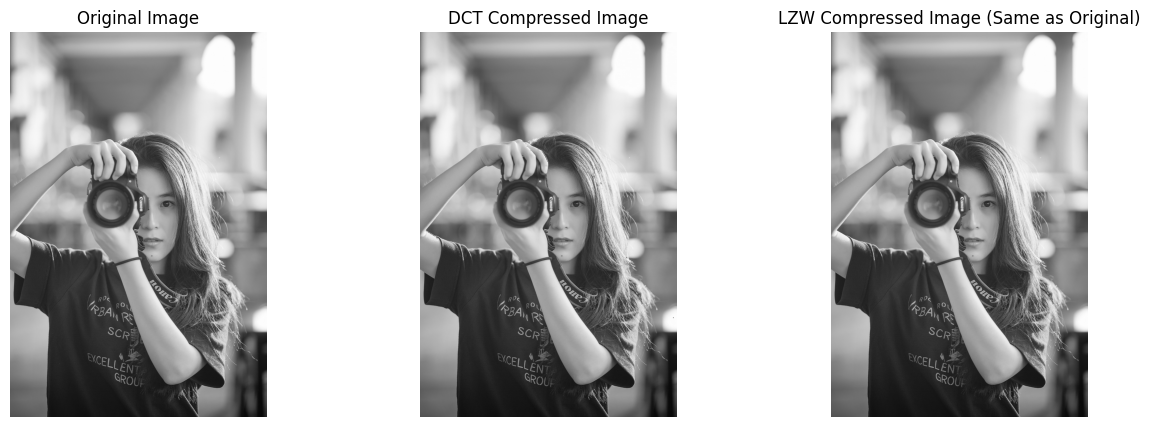

In [5]:
import cv2
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

# Load image in grayscale (DCT works on grayscale images)
def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return image

# Apply DCT compression (Lossy)
def compress_dct(image, keep_fraction=0.5):
    image = np.float32(image) / 255.0  # Normalize
    dct = cv2.dct(image)  # Apply DCT

    # Keep only low-frequency coefficients
    rows, cols = dct.shape
    mask = np.zeros((rows, cols), np.uint8)
    mask[:int(rows * keep_fraction), :int(cols * keep_fraction)] = 1
    dct_compressed = dct * mask

    # Inverse DCT
    image_reconstructed = cv2.idct(dct_compressed)
    return np.uint8(image_reconstructed * 255)  # Rescale to 8-bit

# Save Image using LZW Compression (Lossless)
def compress_lzw(image_path, output_path):
    image = Image.open(image_path)
    image.save(output_path, format="TIFF", compression="tiff_lzw")
    print(f"LZW Compression Done. Saved as {output_path}")

# Compare file sizes
def compare_sizes(original, compressed):
    orig_size = os.path.getsize(original) / 1024
    comp_size = os.path.getsize(compressed) / 1024
    print(f"Original: {orig_size:.2f} KB, Compressed: {comp_size:.2f} KB, Reduction: {100 - (comp_size / orig_size) * 100:.2f}%")

# Display images including LZW compressed image
def display_images(original, dct_compressed, lzw_compressed):
    plt.figure(figsize=(15, 5))

    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    # DCT Compressed Image
    plt.subplot(1, 3, 2)
    plt.imshow(dct_compressed, cmap='gray')
    plt.title("DCT Compressed Image")
    plt.axis('off')

    # LZW Compressed Image
    plt.subplot(1, 3, 3)
    plt.imshow(lzw_compressed, cmap='gray')
    plt.title("LZW Compressed Image")
    plt.axis('off')

    plt.show()

# Main function
def main():
    image_path = "/content/img1.jpg"  # Replace with your image
    dct_output = "compressed_dct.jpg"
    lzw_output = "compressed_lzw.tiff"

    # Load Original Image
    original_image = load_image(image_path)

    # Perform DCT Compression
    compressed_dct_image = compress_dct(original_image, keep_fraction=0.5)
    cv2.imwrite(dct_output, compressed_dct_image)
    print("DCT Compression Done.")
    compare_sizes(image_path, dct_output)

    # Perform LZW Compression
    compress_lzw(image_path, lzw_output)
    compare_sizes(image_path, lzw_output)

    # Load LZW Image back (to verify)
    lzw_compressed_image = cv2.imread(lzw_output, cv2.IMREAD_GRAYSCALE)

    # Display images
    display_images(original_image, compressed_dct_image, lzw_compressed_image)

if __name__ == "__main__":
    main()


Loading MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

Creating and training CNN model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7979 - loss: 0.6166 - val_accuracy: 0.9790 - val_loss: 0.0618
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9729 - loss: 0.0970 - val_accuracy: 0.9875 - val_loss: 0.0384
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9810 - loss: 0.0683 - val_accuracy: 0.9898 - val_loss: 0.0319
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9847 - loss: 0.0537 - val_accuracy: 0.9909 - val_loss: 0.0290
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9874 - loss: 0.0435 - val_accuracy: 0.9909 - val_loss: 0.0327
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9895 - loss: 0.0370 - val_accuracy: 0.9930 - val_loss: 0.0272
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9896 - loss: 0.0325 - val_accuracy: 0.9924 - val_loss: 0.0272
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9913 - loss: 0.0292 - val_accuracy: 

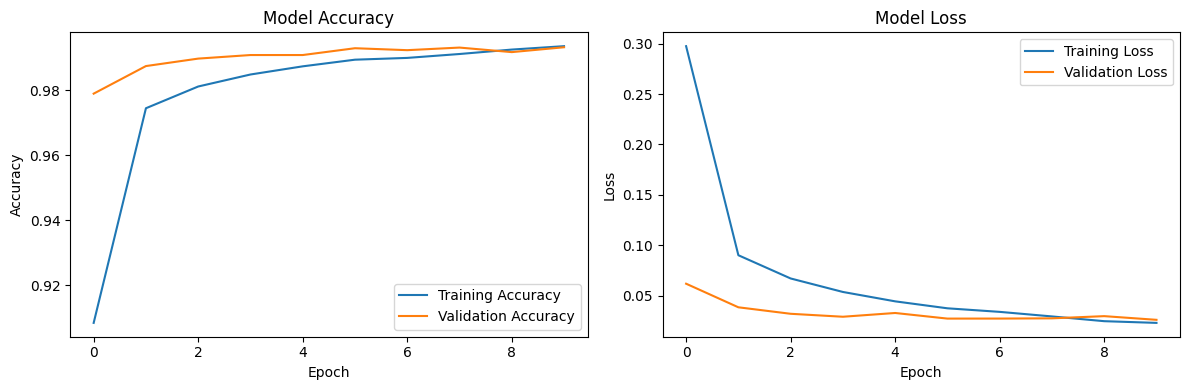

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

Calculating metrics...

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       1.00      0.99      1.00       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000


Plotting confusion matrix...


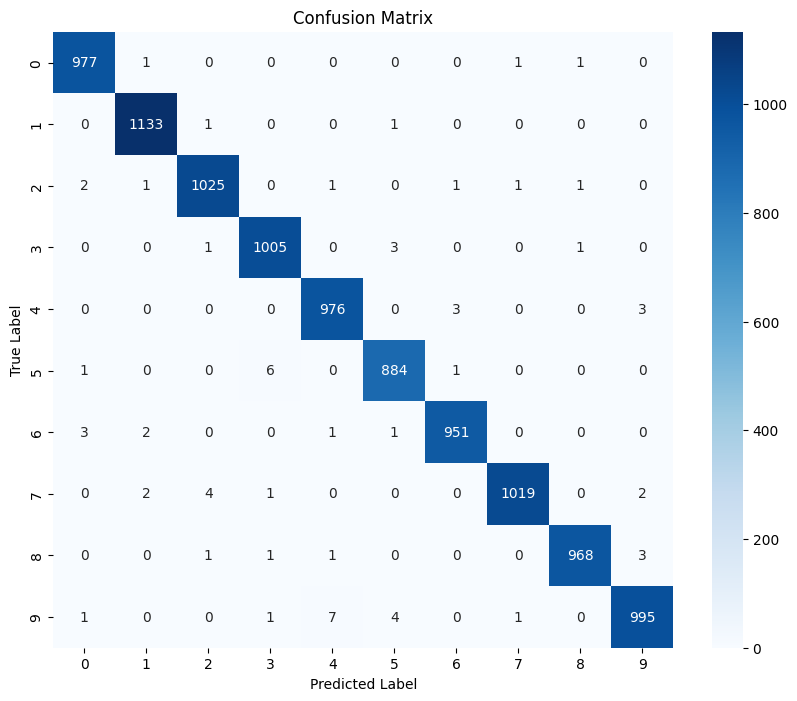


Plotting ROC curves...


<ipython-input-48-a585063800d4>:90: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10')(np.linspace(0, 1, n_classes))


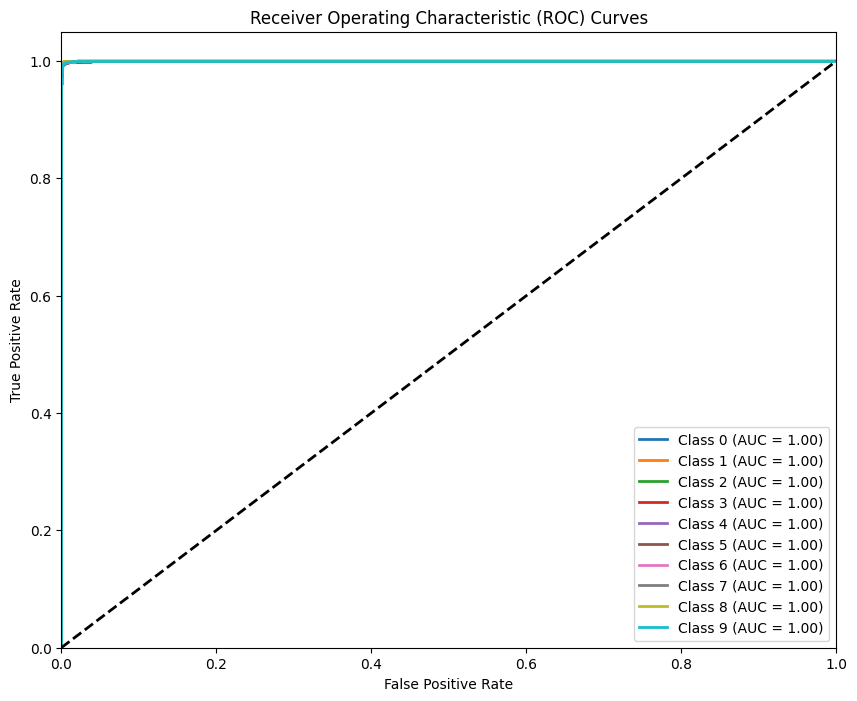


Mean AUC: 1.0000


In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Load and preprocess the data
def load_mnist_data():
    # Load dataset from TensorFlow
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

    # Normalize pixel values
    X_train, X_test = X_train.astype('float32') / 255.0, X_test.astype('float32') / 255.0

    # Reshape images to 28x28x1
    X_train = X_train.reshape(-1, 28, 28, 1)
    X_test = X_test.reshape(-1, 28, 28, 1)

    # Convert labels to categorical
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    return X_train, X_test, y_train, y_test

# Create CNN model
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(np.argmax(y_true, axis=1), np.argmax(y_pred, axis=1))
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Plot ROC curve and compute mean AUC
def plot_roc_curve(y_true, y_pred):
    n_classes = 10
    fpr, tpr, roc_auc = {}, {}, {}

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    colors = plt.cm.get_cmap('tab10')(np.linspace(0, 1, n_classes))

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.show()

    return np.mean(list(roc_auc.values()))

# Main function
def main():
    # Load data
    print("Loading MNIST dataset...")
    X_train, X_test, y_train, y_test = load_mnist_data()

    # Create and train model
    print("\nCreating and training CNN model...")
    model = create_cnn_model()
    history = model.fit(X_train, y_train,
                        batch_size=64,
                        epochs=10,
                        validation_data=(X_test, y_test))

    # Plot training history
    print("\nPlotting training history...")
    plot_training_history(history)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    print("\nCalculating metrics...")
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    print("\nClassification Report:")
    print(classification_report(y_test_classes, y_pred_classes))

    # Plot confusion matrix
    print("\nPlotting confusion matrix...")
    plot_confusion_matrix(y_test, y_pred)

    # Plot ROC curves and calculate AUC
    print("\nPlotting ROC curves...")
    mean_auc = plot_roc_curve(y_test, y_pred)
    print(f"\nMean AUC: {mean_auc:.4f}")

if __name__ == "__main__":
    main()
